In [22]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import numpy as np
import pandas as pd

import matplotlib
matplotlib.use('Agg')  # Ensure a non-interactive backend

import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # Switch backend if only plt is imported

# Ensure inline plotting if running in a Jupyter Notebook
%matplotlib inline

import seaborn as sns

sns.set(style='whitegrid', context='notebook')

# Print a simple confirmation
print('Imports and setup complete.')

# Data Loading
# Read the Excel file from the specified directory
file_path = '/kaggle/input/projectpractise/().xlsx'
try:
    df = pd.read_excel(file_path)
    print('Data loaded successfully.')
except Exception as e:
    print('Error loading data:', e)

# Display first few rows to confirm data was loaded
df.head()


Imports and setup complete.
Data loaded successfully.


,Category,City,Country,Customer Name,Manufacturer,Order Date,Order ID,Postal Code,Product Name,Region,...,Ship Date,Ship Mode,State,Sub-Category,Discount,Number of Records,Profit,Profit Ratio,Quantity,Sales
0,Office Supplies,Houston,United States,Darren Powers,Message Book,2013-01-03,CA-2011-103800,77095,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Central,...,2013-01-07,Standard Class,Texas,Paper,0.2,1,$6,0.34,2,$16
1,Office Supplies,Naperville,United States,Phillina Ober,Avery,2013-01-04,CA-2011-112326,60540,Avery 508,Central,...,2013-01-08,Standard Class,Illinois,Labels,0.2,1,$4,0.36,3,$12
2,Office Supplies,Naperville,United States,Phillina Ober,SAFCO,2013-01-04,CA-2011-112326,60540,SAFCO Boltless Steel Shelving,Central,...,2013-01-08,Standard Class,Illinois,Storage,0.2,1,-$65,-0.24,3,$273
3,Office Supplies,Naperville,United States,Phillina Ober,GBC,2013-01-04,CA-2011-112326,60540,GBC Standard Plastic Binding Systems Combs,Central,...,2013-01-08,Standard Class,Illinois,Binders,0.8,1,-$5,-1.55,2,$4
4,Office Supplies,Philadelphia,United States,Mick Brown,Avery,2013-01-05,CA-2011-141817,19143,Avery Hi-Liter EverBold Pen Style Fluorescent ...,East,...,2013-01-12,Standard Class,Pennsylvania,Art,0.2,1,$5,0.25,3,$20


In [23]:
df.tail() #Diplay last few rows of the dataset

,Category,City,Country,Customer Name,Manufacturer,Order Date,Order ID,Postal Code,Product Name,Region,...,Ship Date,Ship Mode,State,Sub-Category,Discount,Number of Records,Profit,Profit Ratio,Quantity,Sales
9989,Technology,New York City,United States,Patrick O'Donnell,Other,2016-12-30,CA-2014-143259,10009,Gear Head AU3700S Headset,East,...,2017-01-03,Standard Class,New York,Phones,0.0,1,$3,0.03,7,$91
9990,Office Supplies,New York City,United States,Patrick O'Donnell,Wilson Jones,2016-12-30,CA-2014-143259,10009,Wilson Jones Legal Size Ring Binders,East,...,2017-01-03,Standard Class,New York,Binders,0.2,1,$20,0.38,3,$53
9991,Office Supplies,Fairfield,United States,Erica Bern,Cardinal,2016-12-30,CA-2014-115427,94533,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",West,...,2017-01-03,Standard Class,California,Binders,0.2,1,$5,0.33,2,$14
9992,Office Supplies,Fairfield,United States,Erica Bern,GBC,2016-12-30,CA-2014-115427,94533,GBC Binding covers,West,...,2017-01-03,Standard Class,California,Binders,0.2,1,$6,0.31,2,$21
9993,Office Supplies,Loveland,United States,Jill Matthias,Other,2016-12-30,CA-2014-156720,80538,Bagged Rubber Bands,West,...,2017-01-03,Standard Class,Colorado,Fasteners,0.2,1,-$1,-0.20,3,$3


In [24]:
print("Strating data cleaning and preprocessing")

#Convert date columns to datatime type
for date_col in ['Order Date', 'Ship Date']:
    if date_col in df.columns:
        try:
            df[date_col]= pd.to_datetime(df[date_col],errors='coerce')
            print(f"Converted {date_col} to datetime.")
        except Exception as e:
            print(f"Error converting {date_col}:", e)
  #Convert 'Profit' and 'Sales' columns from string to numeric
for col in ['Profit', 'Sales']:
    if col in df.columns:
        df[col]=df[col].replace({'\$': '',',': ''}, regex=True)
        df[col]=pd.to_numeric(df[col], errors='coerce')
        print(f"Converted {col} to numeric")
#It is good practise to check for the missing values
missing_values=df.isnull().sum()
print('Missing value in each column:')
print(missing_values)

#So when we find missing values we drop them as we don't need them and its a part of data cleaning 
df.dropna(subset=['Discount','Quantity','Profit Ratio'])
print('Dropped rows with missing values.')

print('Data cleaning has been completed!')
            

Strating data cleaning and preprocessing
Converted Order Date to datetime.
Converted Ship Date to datetime.
Converted Profit to numeric
Converted Sales to numeric
Missing value in each column:
Category             0
City                 0
Country              0
Customer Name        0
Manufacturer         0
Order Date           0
Order ID             0
Postal Code          0
Product Name         0
Region               0
Segment              0
Ship Date            0
Ship Mode            0
State                0
Sub-Category         0
Discount             0
Number of Records    0
Profit               0
Profit Ratio         0
Quantity             0
Sales                0
dtype: int64
Dropped rows with missing values.
Data cleaning has been completed!


Exploratary Data Analysis(EDA) starting from here..
Numeric columns analysed :['Postal Code', 'Discount', 'Number of Records', 'Profit', 'Profit Ratio', 'Quantity', 'Sales'] 


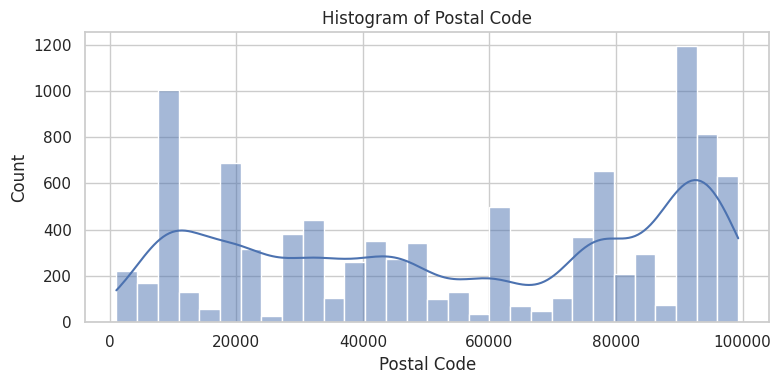

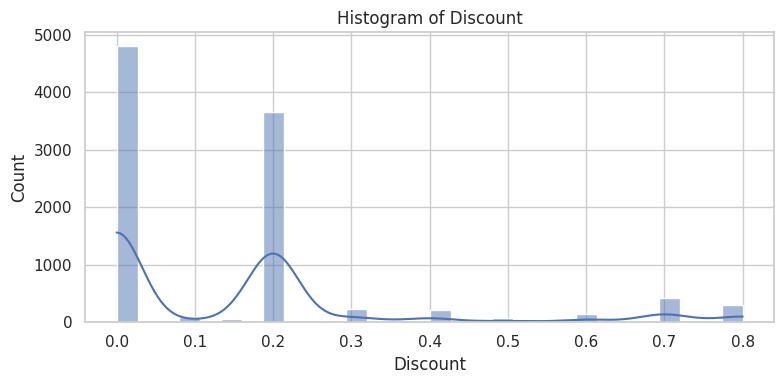

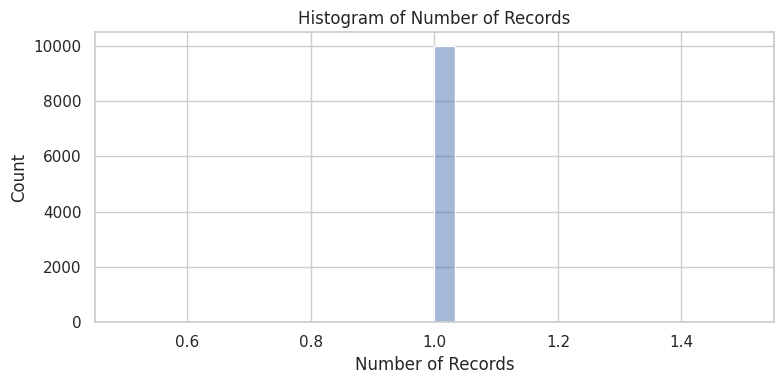

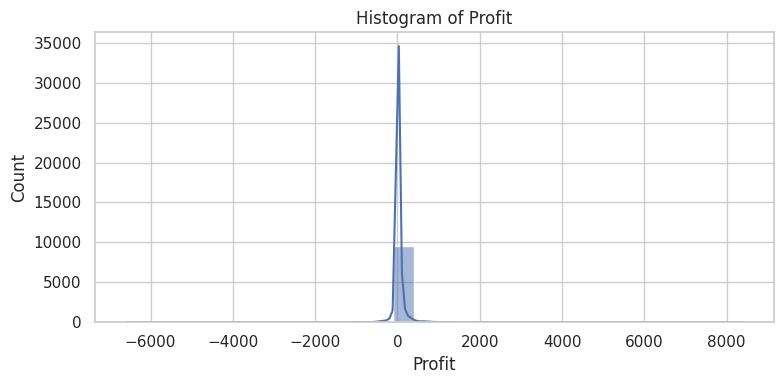

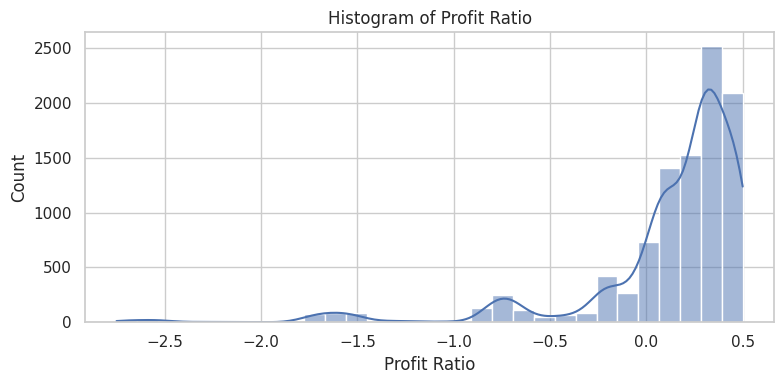

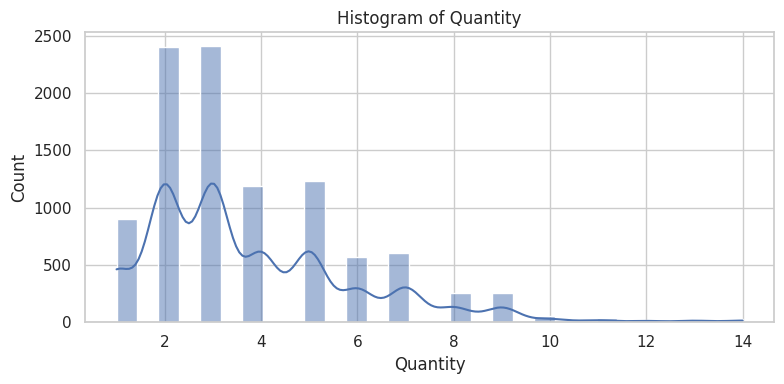

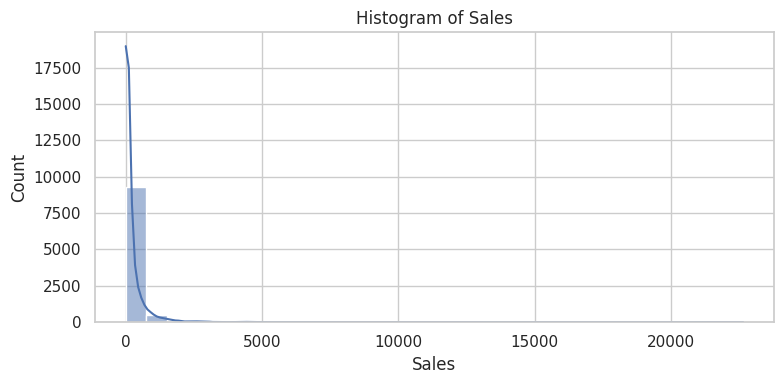

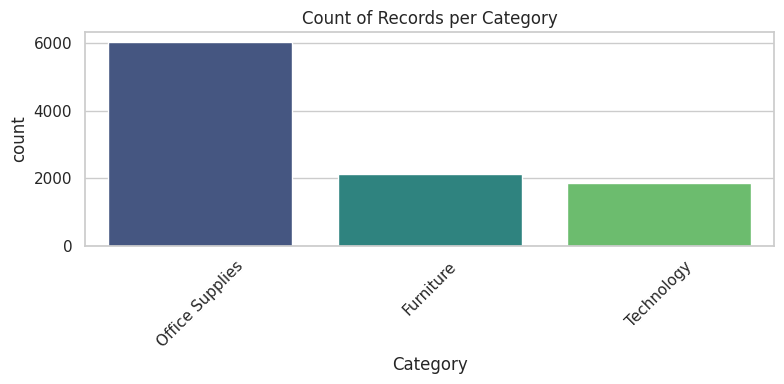

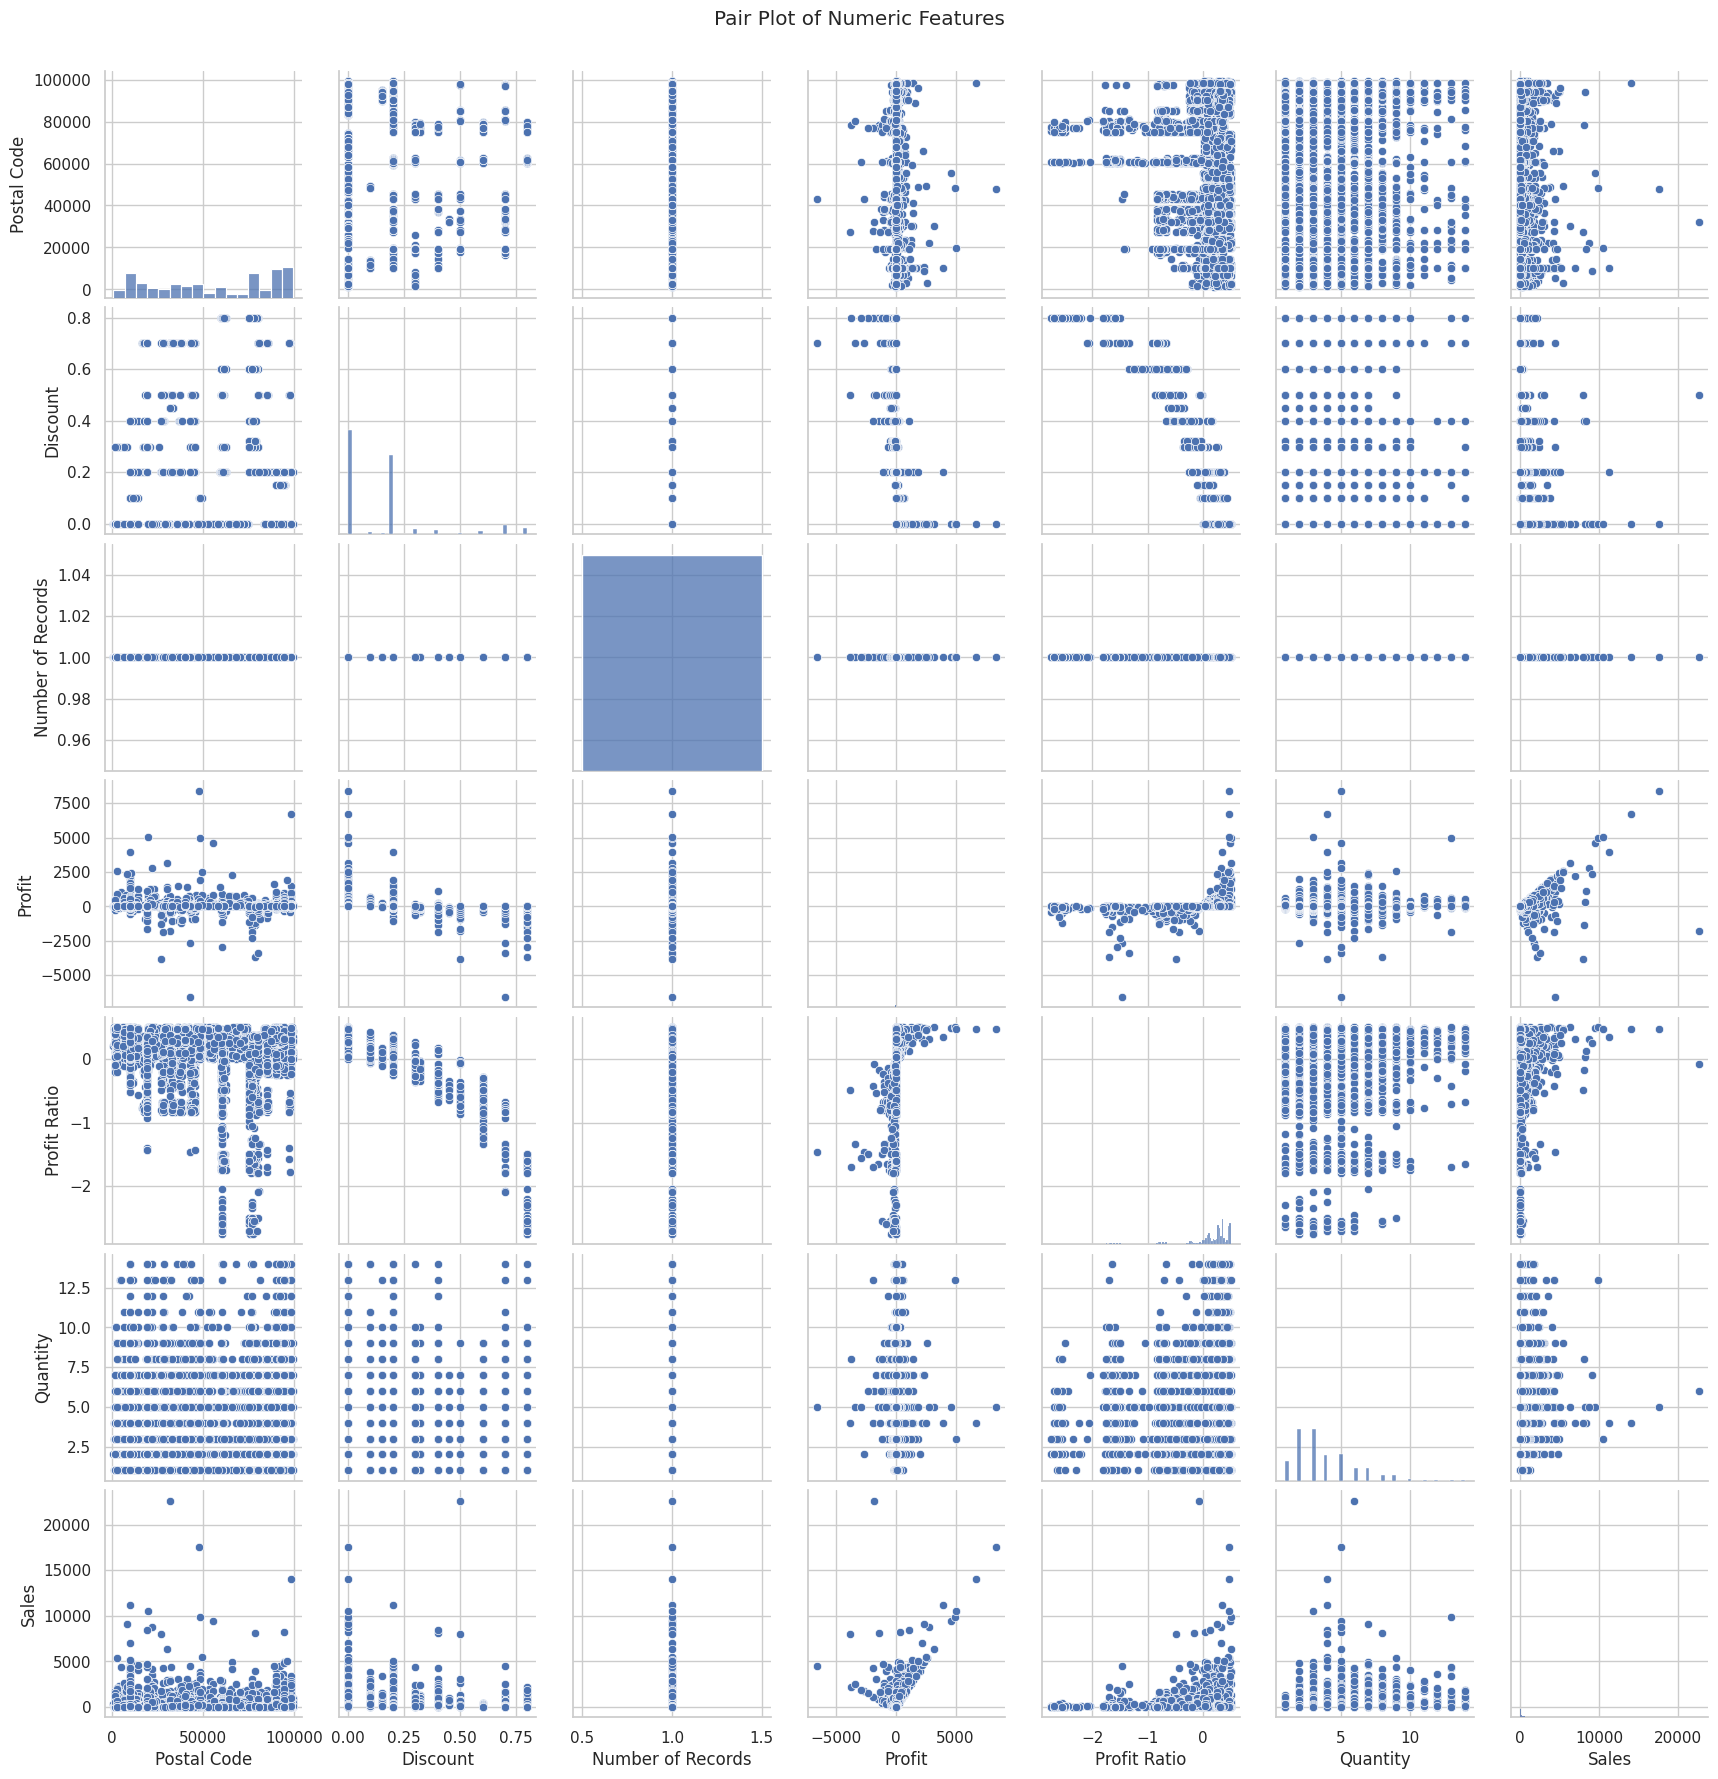

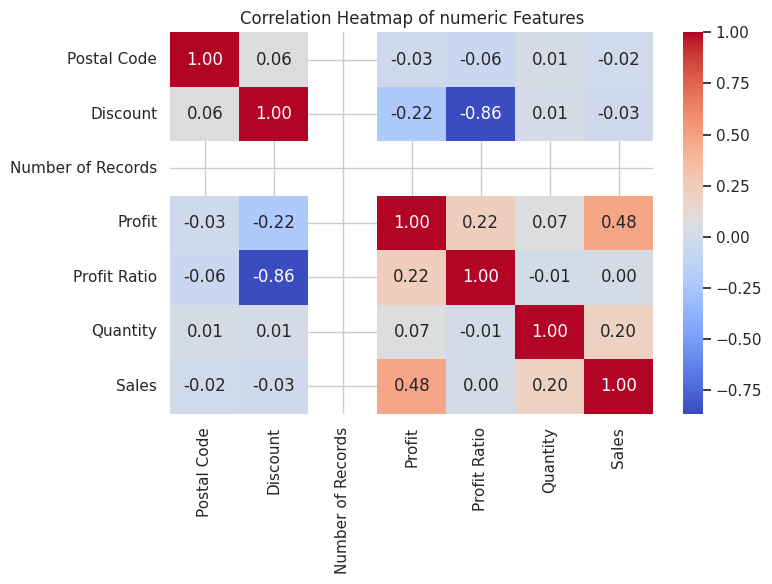

In [25]:
print("Exploratary Data Analysis(EDA) starting from here..")
#EDA starting from here
#Here we are gonna visualise numerical data from the dataset as histogram
numeric_df=df.select_dtypes(include = [np.number])
print(f'Numeric columns analysed :{numeric_df.columns.tolist()} ')

for col in numeric_df.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col].dropna(),kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.tight_layout()
    plt.show()

#plotting countplot for 'Category'
if 'Category' in df.columns:
    plt.figure(figsize=(8,4))
    sns.countplot(x='Category', data=df, palette='viridis')
    plt.title('Count of Records per Category')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#pair plot mapping for a subset of numeric features if enough numeric columns exist
if len(numeric_df.columns)>= 4:
    sns.pairplot(numeric_df.dropna())
    plt.suptitle('Pair Plot of Numeric Features', y=1.02)
    plt.show()

#Correlation heatmap if there are four or more numeric columns 
if len(numeric_df.columns)>= 4:
    plt.figure(figsize=(8,6))
    corr = numeric_df.corr()
    sns.heatmap(corr,annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of numeric Features')
    plt.tight_layout()
    plt.show()

In [26]:
print('Feature engineering starts here....')
#Example: Create a new feature for Shipping Duration in days
if set(['Order Date','Ship Date']).issubset(df.columns):
    df['Shipping Duration']=(df['Ship Date']-df['Order Date']).dt.days
    print('Created feature Shipping Duration')
else:
    print("Order Date and/or Ship Date columns are missing")
#Additional feature:Calculate discounted sales if relevant
if set(['Sales','Discount']).issubset(df.columns):
    df['Discounted Sales']=df['Sales']* (1- df['Discount'])
    print('Created feature Discounted Sales')
print("Feature Engineering complete...")    
    

Feature engineering starts here....
Created feature Shipping Duration
Created feature Discounted Sales
Feature Engineering complete...


Predictive modelling starts here...
Number of records used for modelling:9994
Data split into  training and testing sets
Model training complete
R^2 score of the model:0.745


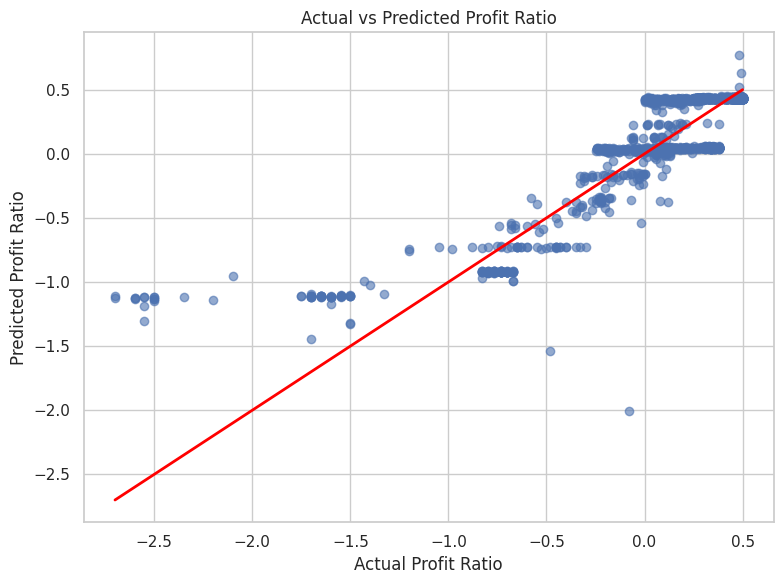

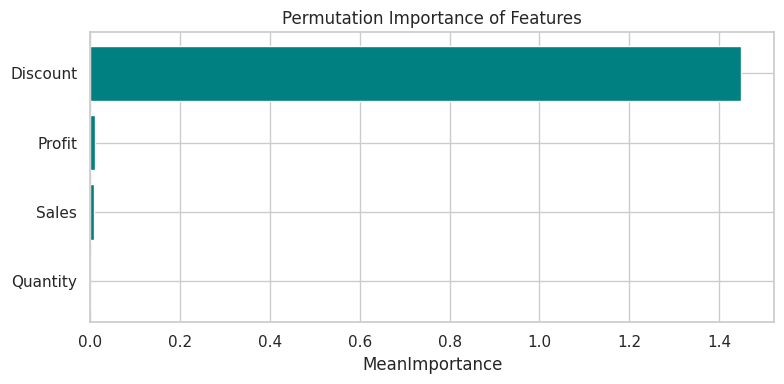

Permutation modeling complete...


In [27]:
#Predictive Modelling
print("Predictive modelling starts here...")
#For drediction we qaim to predict the Profit ratio  using available numerical features.
#We wu=ill use Discount,Quantity,Profit and Sales as predictors . Note that Profit and Sales 
#were converted to numeric earlier .It is imporatant to drop rows with missing values in  these columns

model_df=df[['Discount', 'Quantity', 'Profit', 'Sales', 'Profit Ratio']].dropna()
print(f"Number of records used for modelling:{model_df.shape[0]}")

from sklearn.model_selection import train_test_split
from  sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score
from sklearn.inspection import permutation_importance

#Define independent variables X and target variable Y
X=model_df[['Discount', 'Quantity', 'Profit', 'Sales']]
y=model_df['Profit Ratio']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)
print("Data split into  training and testing sets")

#Initialise and fit the linear regression model
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
print('Model training complete')

#Predict on testing set
y_pred=lr_model.predict(X_test)

#Evaluate the model performance using R^2 score
accuracy=r2_score(y_test,y_pred)
print(f"R^2 score of the model:{accuracy:.3f}")

#Plotting a simple scatter plot of actual vs predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,alpha=0.6)
plt.xlabel('Actual Profit Ratio')
plt.ylabel('Predicted Profit Ratio')
plt.title('Actual vs Predicted Profit Ratio')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color='red',lw=2)
plt.tight_layout()
plt.show()

#Permutation Importance to understand feature influence
r=permutation_importance(lr_model,X_test,y_test,n_repeats=30,random_state=42)
importance_df=pd.DataFrame({'Feature':X.columns,'Importance':r.importances_mean})
importance_df=importance_df.sort_values(by='Importance',ascending=True)

plt.figure(figsize=(8,4))
plt.barh(importance_df['Feature'],importance_df['Importance'],color='teal')
plt.xlabel('MeanImportance')
plt.title('Permutation Importance of Features')
plt.tight_layout()
plt.show()

print("Permutation modeling complete...")



